In [1]:
from empiricaldist import FreqTab
from thinkstats import decorate
from os.path import basename, exists
from nsfg import read_fem_preg, read_fem_resp
import numpy as np

In [2]:
t = [1.0, 2.0, 2.0, 3.0, 5.0]

In [3]:
ftab = FreqTab.from_seq(t)
ftab

,freqs
1.0,1
2.0,2
3.0,1
5.0,1


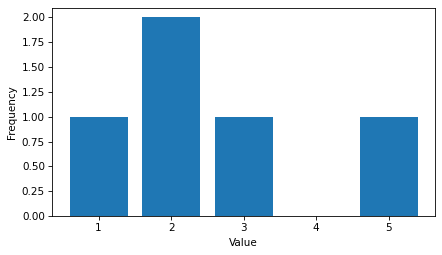

In [4]:
ftab.bar()
decorate(xlabel = "Value", ylabel = "Frequency")

In [5]:
ftab[2.0]

np.int64(2)

In [6]:
ftab(2.0)

np.int64(2)

In [7]:
ftab(4.0)

0

In [8]:
ftab.qs

array([1., 2., 3., 5.])

In [9]:
ftab.fs

array([1, 2, 1, 1])

In [10]:
for x, freq in ftab.items():
    print(x, freq)

1.0 1
2.0 2
3.0 1
5.0 1


In [11]:
preg = read_fem_preg()

In [12]:
live = preg.query('outcome == 1')

In [13]:
ftab_lb = FreqTab.from_seq(live['birthwgt_lb'], name = "birthwgt_lb")

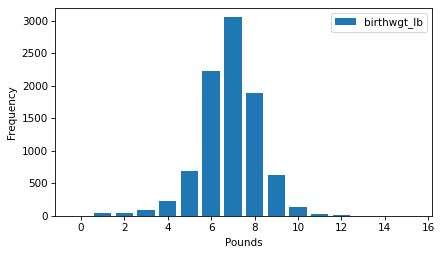

In [14]:
ftab_lb.bar()
decorate(xlabel = "Pounds", ylabel = "Frequency")

In [15]:
ftab_lb.idxmax()

np.float64(7.0)

In [16]:
ftab_lb.mode()

np.float64(7.0)

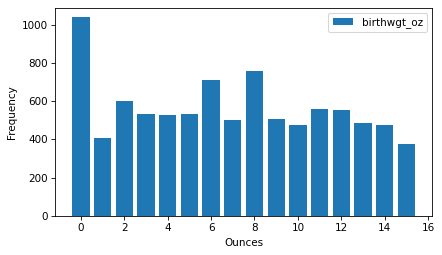

In [17]:
ftab_oz = FreqTab.from_seq(live['birthwgt_oz'], name = 'birthwgt_oz')
ftab_oz.bar()
decorate(xlabel = "Ounces", ylabel = "Frequency")

In [18]:
ftab_age = FreqTab.from_seq(live['agepreg'], name = 'agepreg')

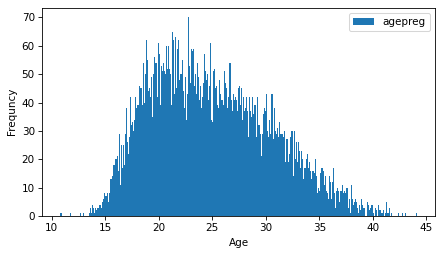

In [19]:
ftab_age.bar(width = 0.1)
decorate(xlabel = "Age", ylabel = "Frequncy")

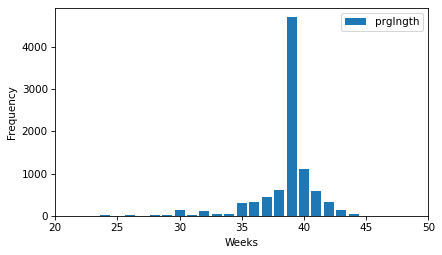

In [20]:
ftab_length = FreqTab.from_seq(live['prglngth'], name = 'prglngth')
ftab_length.bar()
decorate(xlabel = "Weeks", ylabel = "Frequency", xlim = [20,50])

In [21]:
def smallest(ftab, n = 10):
    return ftab[:n]

In [22]:
smallest(ftab_length)

prglngth
0     1
4     1
9     1
13    1
17    2
18    1
19    1
20    1
21    2
22    7
Name: prglngth, dtype: int64

In [23]:
def largest(ftab, n = 10):
    return ftab[-n:]

In [24]:
largest(ftab_length)

prglngth
40    1116
41     587
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: prglngth, dtype: int64

In [25]:
firsts = live.query("birthord == 1")
others = live.query("birthord != 1")

In [26]:
ftab_first = FreqTab.from_seq(firsts["prglngth"], name = "firsts")
ftab_other = FreqTab.from_seq(others["prglngth"], name = "others")

In [27]:
def two_bar_plots(ftab1, ftab2, width = 0.45):
    ftab1.bar(align = "edge", width = -width)
    ftab2.bar(align = "edge", width = width, alpha = 0.5)

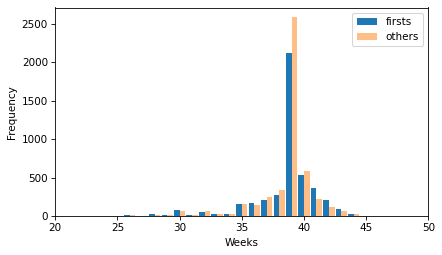

In [28]:
two_bar_plots(ftab_first, ftab_other)
decorate(xlabel = "Weeks", ylabel = "Frequency", xlim = [20,50])

In [29]:
firsts['prglngth'].count(), others['prglngth'].count()

(np.int64(4413), np.int64(4735))

In [30]:
first_mean = firsts['prglngth'].mean()
other_mean = others['prglngth'].mean()
first_mean, other_mean

(np.float64(38.60095173351461), np.float64(38.52291446673706))

In [31]:
diff = first_mean - other_mean
diff, diff * 7 * 24

(np.float64(0.07803726677754952), np.float64(13.11026081862832))

In [32]:
diff / live['prglngth'].mean() * 100

np.float64(0.20237586646738304)

In [33]:
diff / live['prglngth'].std()

np.float64(0.028877623375210403)

In [34]:
group1, group2 = firsts['prglngth'], others['prglngth']
v1, v2 = group1.var(), group2.var()

In [35]:
n1, n2 = group1.count(), group2.count()
pooled_var = (n1 * v1 + n2 * v2) / (n1 + n2)

In [36]:
np.sqrt(pooled_var)

np.float64(2.7022108144953862)

In [37]:
firsts['prglngth'].std(), others['prglngth'].std()

(np.float64(2.7919014146687204), np.float64(2.6158523504392375))

In [38]:
def cohen_effect_size(group1, group2):
    diff = group1.mean() - group2.mean()
    v1, v2 = group1.var(), group2.var()
    n1, n2 = group1.count(), group2.count()
    pooled_var = (n1 * v1 + n2 * v2) / (n1 + n2)
    return diff / np.sqrt(pooled_var)

In [39]:
cohen_effect_size(firsts['prglngth'], others['prglngth'])

np.float64(0.028879044654449834)

In [40]:
df = read_fem_resp()

In [41]:
df.shape

(7643, 3092)

In [42]:
df.columns

Index(['caseid', 'rscrinf', 'rdormres', 'rostscrn', 'rscreenhisp',
       'rscreenrace', 'age_a', 'age_r', 'cmbirth', 'agescrn',
       ...
       'sest', 'cmintvw', 'cmlstyr', 'screentime', 'intvlngth', 'agemarry',
       'age', 'year', 'decade', 'fives'],
      dtype='object', length=3092)

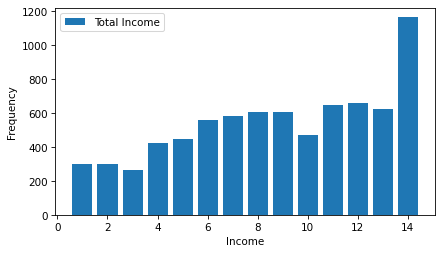

In [43]:
total_income = FreqTab.from_seq(df['totincr'], name = 'Total Income')
total_income.bar()
decorate(xlabel = "Income", ylabel = "Frequency")

In [44]:
table = FreqTab.from_seq(df['parity'])
table

,freqs
parity,
0,3230
1,1519
2,1603
3,828
4,309
5,95
6,29
7,15
8,8


In [45]:
def largest(table, n = 10):
    return table.sort_values(ascending=False)[:n]
largest(table)

parity
0     3230
2     1603
1     1519
3      828
4      309
5       95
6       29
7       15
8        8
10       3
Name: , dtype: int64

In [47]:
highs = df.query("totincr == 14")  
others = df.query("totincr != 14")

In [48]:
ftab_high = FreqTab.from_seq(highs["parity"], name = "High Incomes")
ftab_other = FreqTab.from_seq(others["parity"], name = "Others")

In [49]:
def two_bar_plots(ftab1, ftab2, width = 0.45):
    ftab1.bar(align = "edge", width = -width)
    ftab2.bar(align = "edge", width = width, alpha = 0.5)

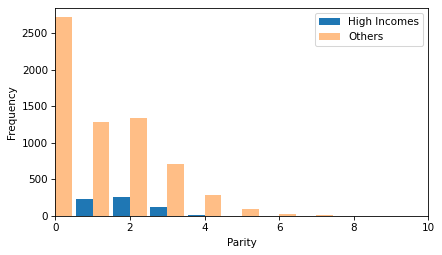

In [53]:
two_bar_plots(ftab_high, ftab_other)
decorate(xlabel = "Parity", ylabel = "Frequency", xlim = [0,10])

In [54]:
highs['parity'].count(), others['parity'].count()

(np.int64(1160), np.int64(6483))

In [55]:
high_mean = highs['parity'].mean()
other_mean = others['parity'].mean()
high_mean, other_mean

(np.float64(1.0758620689655172), np.float64(1.2495758136665125))

In [56]:
diff = high_mean - other_mean
diff, diff * 7 * 24

(np.float64(-0.17371374470099532), np.float64(-29.183909109767214))

In [57]:
diff / df['parity'].mean() * 100

np.float64(-14.201456313506334)

In [58]:
diff / df['parity'].std()

np.float64(-0.12499891827375545)

In [59]:
group1, group2 = highs['parity'], others['parity']
v1, v2 = group1.var(), group2.var()

In [60]:
n1, n2 = group1.count(), group2.count()
pooled_var = (n1 * v1 + n2 * v2) / (n1 + n2)

In [61]:
np.sqrt(pooled_var)

np.float64(1.3883931705752048)

In [62]:
highs['parity'].std(), others['parity'].std()

(np.float64(1.1761668844433981), np.float64(1.4230323371683802))

In [63]:
def cohen_effect_size(group1, group2):
    diff = group1.mean() - group2.mean()
    v1, v2 = group1.var(), group2.var()
    n1, n2 = group1.count(), group2.count()
    pooled_var = (n1 * v1 + n2 * v2) / (n1 + n2)
    return diff / np.sqrt(pooled_var)

In [64]:
cohen_effect_size(highs['parity'], others['parity'])

np.float64(-0.12511855314660367)